In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as patches
import numpy as np
import scipy
from scipy.optimize import curve_fit
import cv2
from PIL import Image
import glob

import images_library

# DEFINIZIONE ROI 
Dati nella cartella 20221102_Flash/2022_11_04_flash_1mm/spettro/f8
open -> 323, 236
405 nm -> 323, 235 
488 nm -> 323, 235
457 nm -> 323, 235
635 nm -> 323, 235


CCD saturate in 25 pixels; the max value recorded is 65535
File: 20221102_Flash/2022_11_04_flash_1mm/spettro/f8/e9MeV_12Gy_open_1.TIF
Center: 323, 236


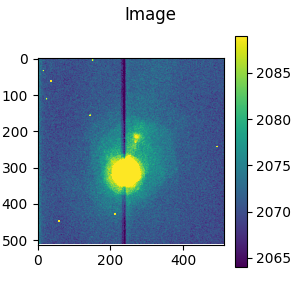

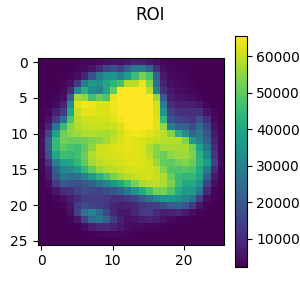

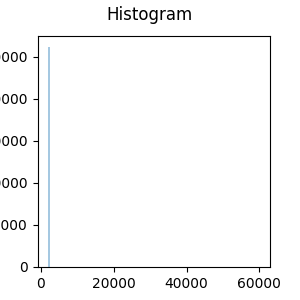

In [2]:
inputFile = "20221102_Flash/2022_11_04_flash_1mm/spettro/f8/e9MeV_12Gy_open_1.TIF"
imArray=images_library.openImage(inputFile)
images_library.plotImage(imArray, title="Image")

images_library.checkSaturation(imArray)

cenX, cenY= 323, 236#vanno definiti in funzione della posizione della fibra scintillante
r = 13#va impostato

x, y = np.ogrid [:len(imArray[0]) , :len(imArray[1])]
ROI=images_library.defineROI(x, y, cenX, cenY, r)
images_library.plotImage(images_library.applySquareROI(imArray, cenX, cenY, r), title="ROI")

vmin, vmax= 2000, 60000
bins=np.linspace(vmin-0.5, vmax+0.5, 100 )
images_library.histImage(imArray, bins=bins, title ="Histogram")

print("File: %s" % inputFile )
print("Center: %d, %d" % (cenX, cenY))

Added an image to the dictionary with key: open


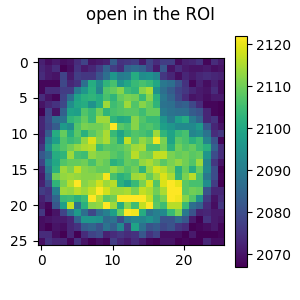

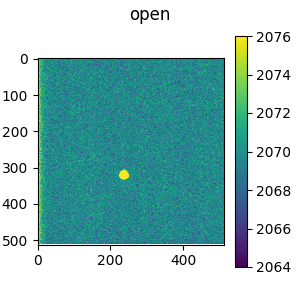

In [3]:
darkFiles = glob.glob(f"20221102_Flash/2022_11_04_flash_1mm/spettro/f8/*buio*.TIF")

darkDict={}
word = "open"
keyDark=images_library.fillDict(darkDict, darkFiles, word, "dati")
for k in keyDark:
    images_library.plotImage(images_library.applySquareROI(darkDict[k], cenX, cenY, r), title='%s in the ROI' %k)
    images_library.plotImage(darkDict[k], title ='%s' %k)

In [4]:
cerenkovFiles = glob.glob(f"20221102_Flash/2022_11_04_flash_1mm/spettro/f8/*.TIF" )
cerDictFiles={}
word = "open"
keys=images_library.fillDict(cerDictFiles, cerenkovFiles, word, "buio")

Added an image to the dictionary with key: open_1
Added an image to the dictionary with key: open_2
Added an image to the dictionary with key: open_3


In [5]:
#Nel dizionario dei file di buio seleziona quello della giusta lunghezza d'onda, e stessa cosa nei file dati
cerDiff = images_library.diffImDark(cerDictFiles, darkDict[keyDark[0]])

N of pixels with more events than background:  [517, 517, 517]
Light integral in the ROI:  [15857774, 15754189, 15708726]
Mean light in the ROI:  [30672.67698259 30472.31914894 30384.38297872]
Mean: 30509, Stdev: 120


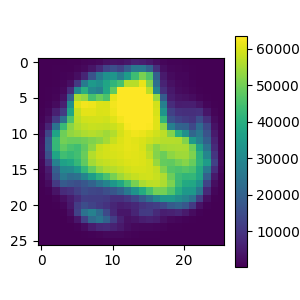

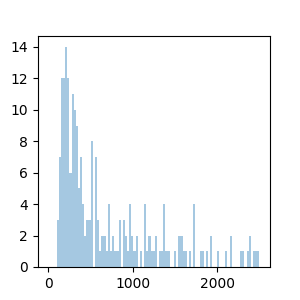

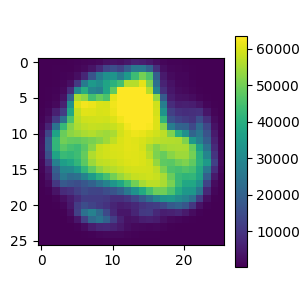

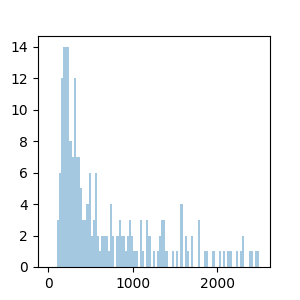

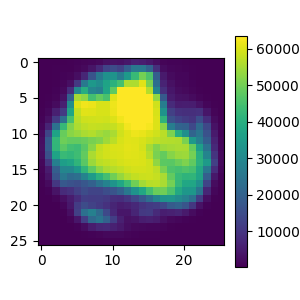

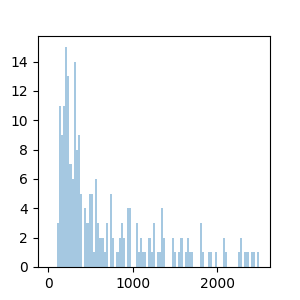

In [6]:
lightIntegral=[]
nOfPixels=[]
for im in cerDiff: 
    eventROI = images_library.applySquareROI(im, cenX, cenY, r)
    images_library.plotImage(eventROI)    
    vmin, vmax= 0, 2500
    bins=np.linspace(vmin-0.5, vmax+0.5, 100 )
    images_library.histImage(eventROI, bins=bins)
    lightIntegral.append(np.sum(im[ROI]))    
    nOfPixels.append(len(im[ROI]))
    
print("N of pixels with more events than background: ", nOfPixels)
print("Light integral in the ROI: ", lightIntegral)
mean = np.array(lightIntegral)/np.array(nOfPixels)
print("Mean light in the ROI: ", mean)

lightMean = np.mean(mean)
lightStdev = np.std(mean)
print('Mean: %d, Stdev: %d' % (lightMean, lightStdev))


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[ 3959563  5969010  7539558  9339496 11178369 12824161 14390012 15323912
 15773563 15881993 15918470]
[11275 19193 25241 31836 39509 47074 56246 61450 62371 62652 62792]


Text(0, 0.5, 'Integrale segnale')

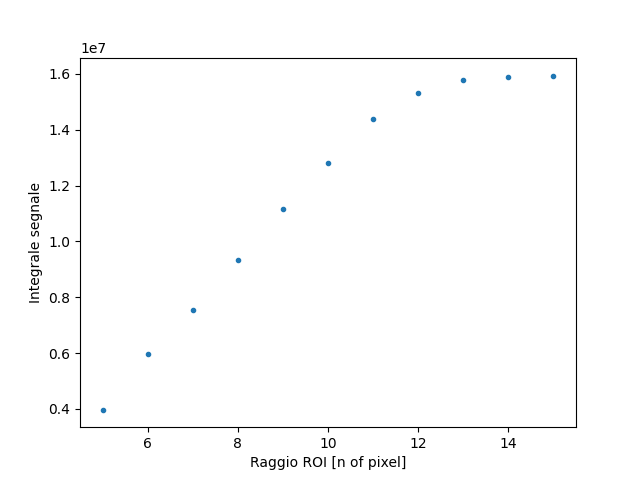

In [7]:
#Guardo le variazioni del risultato in funzione della dimensione della ROI
ROIs = []
lightIntegralStdev = []
lightIntegralMean=[]
radii = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for r in radii:
    roi=images_library.defineROI(x, y, cenX, cenY, r)
    ROIs.append(roi)
    l = []
    for im in cerDiff: 
        eventROI = images_library.applySquareROI(im, cenX, cenY, r)
        l.append(np.sum(im[roi]))
    lightIntegralMean.append(np.mean(l))
    lightIntegralStdev.append(np.std(l))
    
print(radii)    
print(np.array(lightIntegralMean, dtype=np.int32))
print(np.array(lightIntegralStdev, dtype=np.int32))

fig, ax = plt.subplots(1,1)
ax.errorbar(radii, lightIntegralMean, yerr=lightIntegralStdev, fmt='.')
ax.set_xlabel("Raggio ROI [n of pixel]")
ax.set_ylabel("Integrale segnale")

In [10]:
r= [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


#open
Open =[ 3959563,  5969010,  7539558,  9339496, 11178369, 12824161, 14390012, 15323912, 15773563, 15881993, 15918470]
openErr=[11275, 19193, 25241, 31836, 39509, 47074, 56246, 61450, 62371, 62652, 62792]

#405 nm
f405=[ 78772, 118245, 148727, 184378, 217702, 246506, 273368, 287455, 291665, 292863, 293494]
f405Err=[ 95, 161, 233, 361, 482, 603, 545, 663, 674, 713, 719]


#488 nm
f488=[ 621512,  941241, 1189226, 1466517, 1721910, 1935322, 2144285, 2256522, 2290530, 2299608, 2303965]
f488Err=[2629, 3988, 4975, 5775, 6652, 7812, 8374, 8881, 9004, 9077, 9080]

#457 nm
f457=[ 793639, 1190898, 1493991, 1835731, 2154724, 2423627, 2685431, 2827163, 2869214,  2879750, 2884716]
f457Err=[1980, 2927, 3742, 4305, 5299, 5563, 6248, 6337, 6376, 6402, 6387]



#Filtro 635 nm -> 323, 235
f635=[ 40493,  61851,  79871, 100435, 120237, 137081, 153031, 163236, 169370, 171215, 171785]
f635Err=[ 199,  381,  532,  566,  707,  831,  945,  987, 1042, 1113, 1131]


405 nm: 1.918117 +- 0.055554
488 nm: 15.139709 +- 0.521050
457 nm: 19.017797 +- 0.724229
635 nm: 1.063437 +- 0.017353


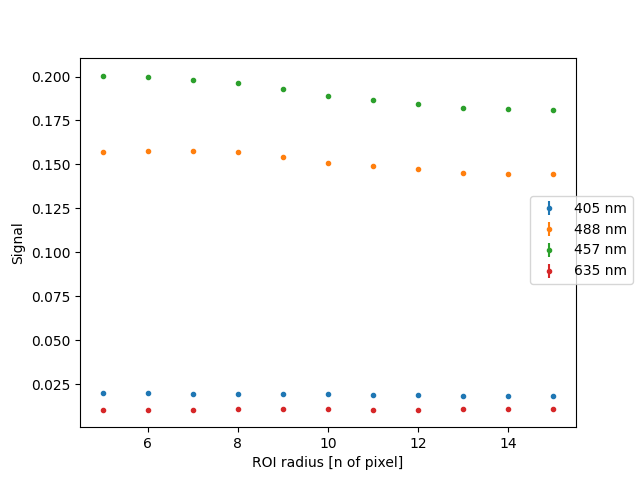

In [13]:
def ratioError(a,b, aErr, bErr):
    a = np.array(a)
    b=np.array(b)
    aErr = np.array(aErr)
    bErr=np.array(bErr)  
    error =np.sqrt((aErr/b)**2 + (bErr/b * a/b)**2) 
    return error

def ratio(a,b):
    a=np.array(a)
    b=np.array(b)
    return a/b


fig, ax = plt.subplots(1,1)
ax.errorbar(r, ratio(f405, Open), yerr=ratioError(f405, Open, f405Err, openErr), fmt='.', label="405 nm")
ax.errorbar(r, ratio(f488, Open), yerr=ratioError(f488, Open, f488Err, openErr), fmt='.', label="488 nm")
ax.errorbar(r, ratio(f457, Open), yerr=ratioError(f457, Open, f457Err, openErr), fmt='.', label="457 nm")
ax.errorbar(r, ratio(f635, Open), yerr=ratioError(f635, Open, f635Err, openErr), fmt='.', label="635 nm")
ax.set_xlabel("ROI radius [n of pixel]")
ax.set_ylabel("Signal")
fig.legend(loc="center right")

print("405 nm: %f +- %f" % (np.mean(ratio(f405, Open))*100, 100*np.std(ratio(f405, Open))))
print("488 nm: %f +- %f" % (np.mean(ratio(f488, Open))*100, 100*np.std(ratio(f488, Open))))
print("457 nm: %f +- %f" % (np.mean(ratio(f457, Open))*100, 100*np.std(ratio(f457, Open))))
print("635 nm: %f +- %f" % (np.mean(ratio(f635, Open))*100, 100*np.std(ratio(f635, Open))))


Text(0, 0.5, 'signal/Open')

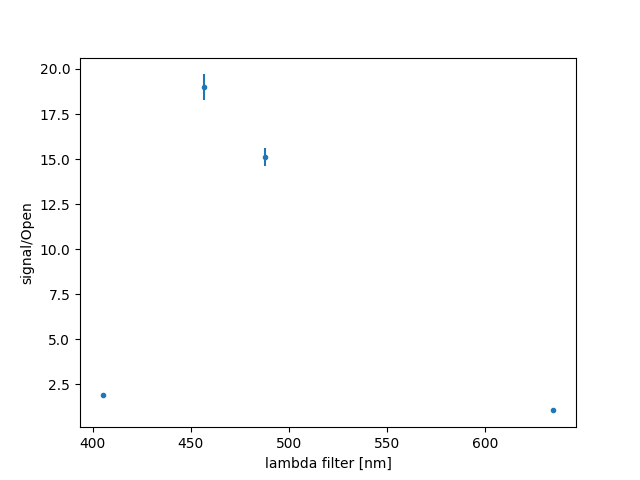

In [16]:
l = [405, 488, 457, 635] #nm
meanRatio = [1.92, 15.1, 19.0, 1.06] # mean ratio with the open case
stdevRatio = [0.06, 0.5, 0.7, 0.02]


fig, ax = plt.subplots(1,1)
ax.errorbar(l, meanRatio, stdevRatio, fmt='.')
ax.set_xlabel("lambda filter [nm]") 
ax.set_ylabel("signal/Open")
